In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.34628452]
 [2.69886125]]


In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.34628452]
 [9.74400702]]


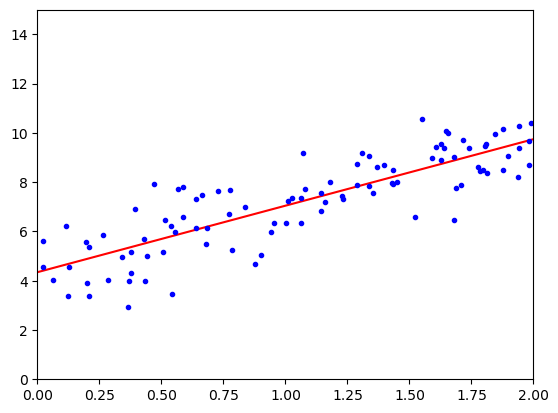

In [4]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

비용함수를 최소화하는 Θ(모델)값을 찾는 방법으로 경사하강법과 정규방정식이 있음
정규방정식은 역행렬을 이용해서 값을 구하는 방법이다.
고정된 계산 시간이 장점이지만 feature가 많은 경우 계산량이 많아져 상당히 느려진다. 또한 행렬의 역행렬이 항상 존재한다는 보장이 없는 단점이 있다.
^Θ = (X^TX)^-1X^Ty

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.34628452] [[2.69886125]]
[[4.34628452]
 [9.74400702]]


In [6]:
theta_best_svg, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svg

array([[4.34628452],
       [2.69886125]])

In [7]:
np.linalg.pinv(X_b).dot(y)


array([[4.34628452],
       [2.69886125]])

경사하강법은 파라미터값을 점진적으로 조정하면서 비용 함수를 최적화 시키는 방법이다.
기울기가 높은 방향을 선택하고 해당 방향으로 진행해서 기울기가 0이 되는 곳을 찾는 방법이다.
다만 비용함수에 따라 해당 지점이 전역 최솟값이라 보장할 순 없다.
mse는 기울기가 급격히 변하지 않고 최소점도 한 곳이기 때문에 전역 최솟값에 접근할 수 있는 비용 함수이다.

데이터의 스케일에 따라 비용함수의 모양도 변하게 된다.
두 특징의 스케일이 균일하면 mse 함수도 원형을 그리지만 한 쪽의 분포가 크게 높다면 타원형이 되어 전역 최솟값에 도달하기 어려워진다.

In [8]:
import numpy as np

eta = 0.1#learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.34628452],
       [2.69886125]])

In [9]:
# SGD
#배치 경사 하강법은 전체 데이터를 모두 사용하기 때문에 
n_epochs = 50
t0, t1 = 5, 50

#최솟값에 수렴할 수 있도록 학습률을 0.1에서 0.05로 점진적으로 줄임
def learnign_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        #앞 부분의 데이터가 뒷 부분의 데이터 보다 자주 사용됨
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        #mse의 도함수
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learnign_schedule(epoch * m + i)
        theta -= eta * gradients


In [10]:
theta

array([[4.26492554],
       [2.73969821]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_
#coef_ x + intercept_

(array([4.33430141]), array([2.67634727]))

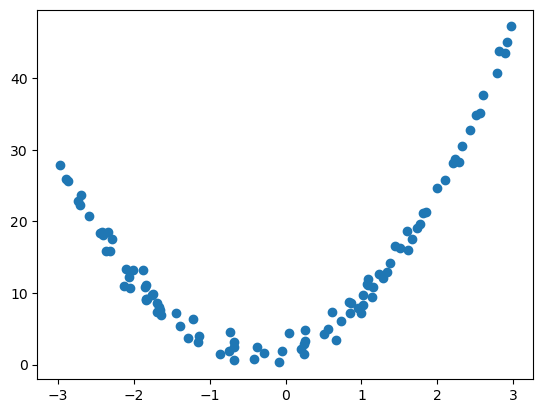

In [49]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 4 * X**2 + 3 * X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'o')
plt.show()

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
#입력한 값을 x, x^2, ..., x^n 형식으로 변환함
X_poly = poly_feature.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.21905224]
[-1.21905224  1.48608836]


In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.20305795] [[3.06933712 3.9569478 ]]


학습한 데이터에 과대, 과소 적합인지 확인하는 방법으로 학습 곡선을 그려 확인할 수 있다.

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

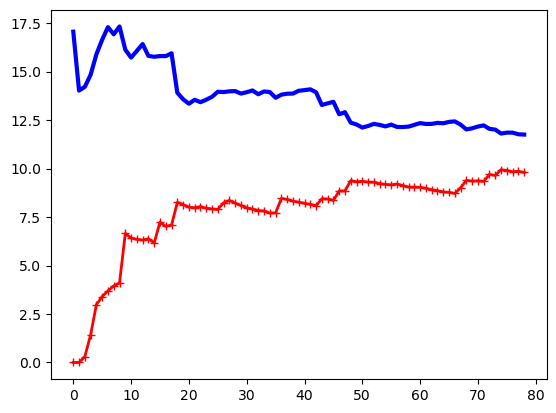

In [54]:
lin_reg= LinearRegression()
plot_learning_curves(lin_reg, X, y)

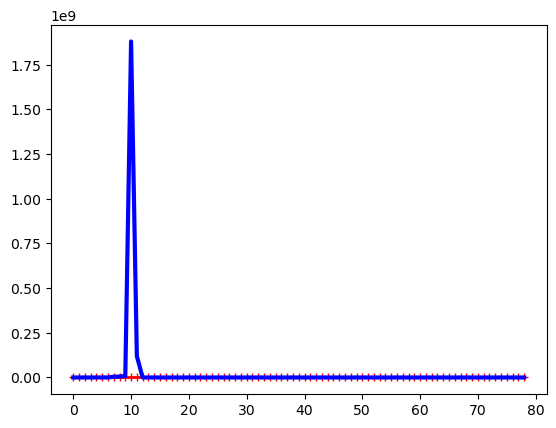

In [108]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

오차
1. 편향: 잘못된 가정으로 생기는 오차로 2차 데이터인데 다른 차원의 함수를 만든 경우에 생김. 과소적합이 발생하기 쉬움
2. 분산: 데이터의 작은 데이터에 민감하게 반응해서 생기는 오차. 자유도가 높은 모델의 경우 과대적합이 발생하기 쉬움(매우 높은 n차원 모델)
3. 줄일 수 없는 오차: 데이터 수집 시 발생하는 오차 또는 이상치로 인해 발생하는 오차.
통상적으로 모델이 복잡하면 편향이 줄어들고 분산이 커진다 반면 모델이 단순하면 분산은 줄어드는 대신 편향이 높아진다.
만약 복잡한 모델을 사용할 경우 적절한 규제를 통해서 과적합을 막는 것도 하나의 방법이 된다.

In [40]:
#릿지 회귀 or 티호노프 규제
#비용 함수에 a∑Θ^2이 추가됨
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.91537875]])

In [41]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.88606519])

In [42]:
#라쏘 회귀
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([4.86024052])

In [43]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.865127])

In [ ]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

poly_scaler=Pipeline([
    ("poly_feature", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.Infinity, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [ ]:
from sklearn.base import clone

poly_scaler = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)